# k-Means

In [1]:
import matplotlib.pyplot as pp
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
data = fetch_mldata("MNIST original")
X, y = data.data, data.target

In k-means we try to divide the data into $k$ clusters by picking $k$ cluster centers and assigning each datapoint to the closest one, recomputing the cluster centers and iterating until convergence. This is an approximation to finding $k$ cluster centers such that the total squared distance of all points to their respective center is minimized.

$$\min \sum_{i = 1}^n ||x_i - \mu_{n_i}||^2$$

where $n_i$ is the cluster that $x_i$ is assigned to.

In [3]:
class KMeansClustering(BaseEstimator, ClusterMixin):
    def __init__(self, k=1):
        self.k = k
        
    def fit(self, X, y=None, verbose=False):
        k = self.k
        n, m = X.shape
        mu = np.empty((k, m))
        
        # k-means++ initialization
        mu[0] = X[np.random.randint(len(X))]
        
        # Squared distance to already initialized cluster centers
        D = np.empty((n, k))
        D[:, 0] = np.sum((X - mu[0])**2, axis=1)
        
        for i in range(1, k):
            # Build a probability distribution over data points proportional
            # to the minimal squared distance to any previous center
            p = D[:, :i].min(axis=1)
            p = p / p.sum()

            mu[i] = X[np.random.choice(len(X), p=p)]
            
            D[:, i] = np.sum((X - mu[i])**2, axis=1)
        
        # k-means iterations
        mu_prev = mu.copy()
        while True:
            for i in range(k):
                D[:, i] = np.sum((X - mu[i])**2, axis=1)
                
            labels = D.argmin(axis=1)
            
            for i in range(k):
                mu[i] = X[labels == i].mean(axis=0)
            
            progress = np.linalg.norm(mu - mu_prev)
            if verbose:
                print(f"Progress: {progress}")
            if progress < 10**-8:
                break
            
            mu_prev = mu.copy()

        self.mu_ = mu
        self.labels_ = labels

In [4]:
m = KMeansClustering(10)
m.fit(X, verbose=True)

Progress: 4076.2984743166453
Progress: 669.9248662097294
Progress: 436.58668494000136
Progress: 287.775590626561
Progress: 196.3654828527923
Progress: 142.21551612303128
Progress: 114.51973542155044
Progress: 99.37556212604713
Progress: 92.2278709164223
Progress: 83.70525345055304
Progress: 79.50312264501275
Progress: 79.30427089287504
Progress: 88.37593892640501
Progress: 95.67698065662468
Progress: 112.26807487957241
Progress: 119.88936904538956
Progress: 109.26293865107242
Progress: 100.97432919297384
Progress: 91.95921004582463
Progress: 79.71365252804456
Progress: 66.74055467329666
Progress: 58.38862204694047
Progress: 52.92601549978563
Progress: 47.045140286557945
Progress: 40.7931308937067
Progress: 37.62667064459938
Progress: 35.36949498127841
Progress: 33.374012735127685
Progress: 31.30543109468692
Progress: 26.25583556247904
Progress: 24.19197629633389
Progress: 19.43699711479696
Progress: 17.514350521761898
Progress: 16.07619756723192
Progress: 15.67001608408388
Progress: 15

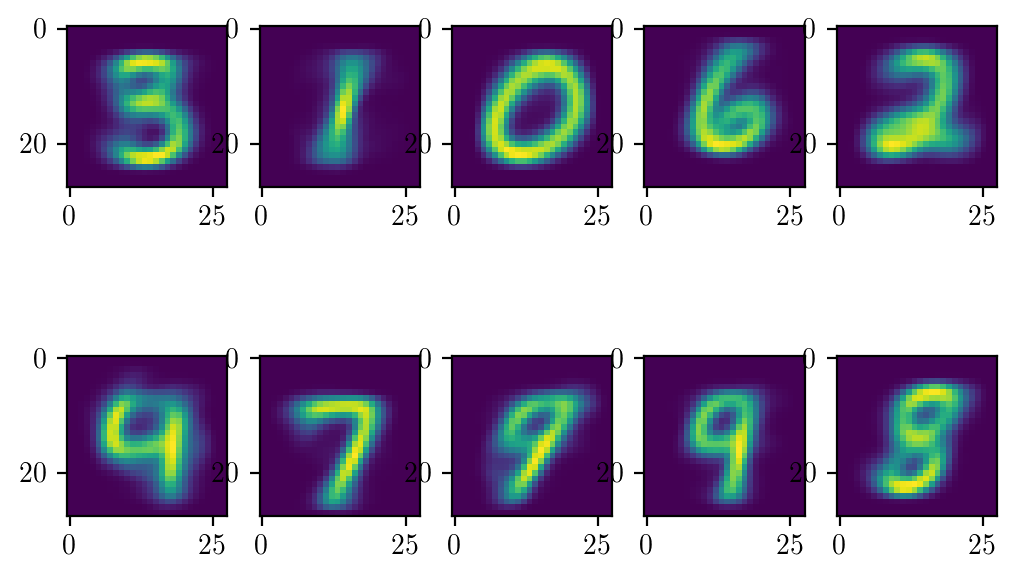

In [5]:
fig, ax = pp.subplots(2, 5, dpi=200)
ax = [b for a in ax for b in a]

for i in range(len(m.mu_)):
    ax[i].imshow(m.mu_[i].reshape((28, 28)))